## Semantic Segmentation Algorithm

The SageMaker semantic segmentation algorithm provides a fine-grained, pixel-level approach to developing computer vision applications. It tags every pixel in an image with a class label from a predefined set of classes. Tagging is fundamental for understanding scenes, which is critical to an increasing number of computer vision applications, such as self-driving vehicles, medical imaging diagnostics, and robot sensing.

In [2]:
import boto3
import numpy as np
from IPython.core.display import HTML
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import json

In [3]:
region = boto3.Session().region_name
s3_bucket = f"jumpstart-cache-prod-{region}"
key_prefix = "inference-notebook-assets"
s3 = boto3.client("s3")

In [4]:
def download_from_s3(key_filenames):
    for key_filename in key_filenames:
        s3.download_file(s3_bucket, f"{key_prefix}/{key_filename}", key_filename)

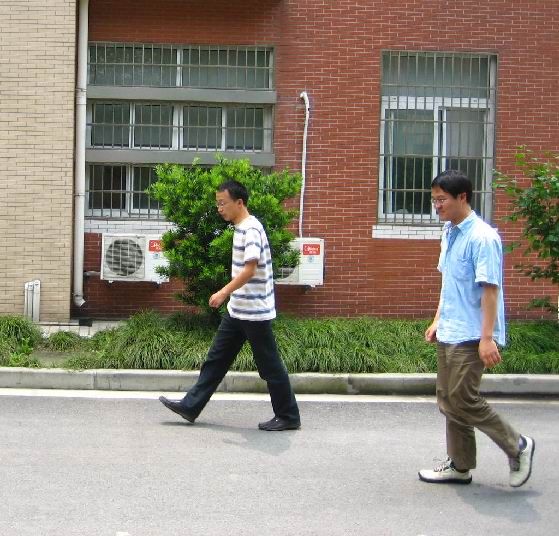

In [5]:
img_jpg = "img_pedestrian.png"
download_from_s3(key_filenames=[img_jpg])
Image.open(img_jpg)

In [6]:
def query_endpoint(input_img):
    endpoint_name = 'jumpstart-dft-mx-semseg-fcn-resnet1-20231218-164001'
    client = boto3.client('runtime.sagemaker')
    response = client.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/x-image', Body=input_img, Accept='application/json;verbose')
    return response

def parse_response(query_response):
    response_dict = json.loads(query_response['Body'].read())
    return response_dict['predictions'],response_dict['labels'], response_dict['image_labels']

In [7]:
with open(img_jpg, 'rb') as file: input_img = file.read()

try:
    query_response = query_endpoint(input_img)
except Exception as e:
    if e.response['Error']['Code'] == 'ModelError':
        raise Exception(
             "Backend scripts have been updated in Feb '22 to standardize response "
             "format of endpoint response."
             "Previous endpoints may not support verbose response type used in this notebook."
             f"To use this notebook, please launch the endpoint again. Error: {e}."
        )
    else:
        raise
try:
    predictions, labels, image_labels =  parse_response(query_response)
except (TypeError, KeyError) as e:
    raise Exception(
          "Backend scripts have been updated in Feb '22 to standardize response "
          "format of endpoint response."
           "Response from previous endpoints not consistent with this notebook."
           f"To use this notebook, please launch the endpoint again. Error: {e}."
   )

In [8]:
print('Objects present in the picture:',image_labels)

def getvocpallete(num_cls):
    n = num_cls
    pallete = [0]*(n*3)
    for j in range(0, n):
        lab = j
        pallete[j*3+0] = 0
        pallete[j*3+1] = 0
        pallete[j*3+2] = 0
        i = 0
        while (lab > 0):
            pallete[j*3+0] |= (((lab >> 0) & 1) << (7-i))
            pallete[j*3+1] |= (((lab >> 1) & 1) << (7-i))
            pallete[j*3+2] |= (((lab >> 2) & 1) << (7-i))
            i = i + 1
            lab >>= 3
    return pallete


Objects present in the picture: ['background', 'person']


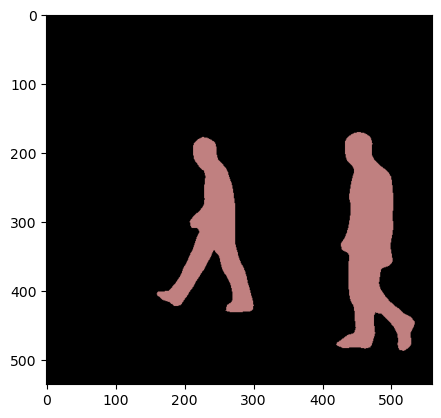

In [9]:
pallete = getvocpallete(256)
npimg = np.array(predictions)
npimg[npimg == -1] = 255
mask = Image.fromarray(npimg.astype('uint8'))
mask.putpalette(pallete)
plt.imshow(mask)
plt.show()

In [10]:
!wget https://a.b.cdn.console.awsstatic.com/a/v1/ATAQEMBBMBTAQOXK4T5MBV4XAXYE63V24MSL7G3R4C7JBJPMX3EA/StaticImageAssets/Images/skateboard_resized.jpg

--2023-12-18 14:08:08--  https://a.b.cdn.console.awsstatic.com/a/v1/ATAQEMBBMBTAQOXK4T5MBV4XAXYE63V24MSL7G3R4C7JBJPMX3EA/StaticImageAssets/Images/skateboard_resized.jpg
Resolving a.b.cdn.console.awsstatic.com (a.b.cdn.console.awsstatic.com)... 3.160.119.38, 3.160.119.64, 3.160.119.75, ...
Connecting to a.b.cdn.console.awsstatic.com (a.b.cdn.console.awsstatic.com)|3.160.119.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1168331 (1.1M) [image/jpeg]
Saving to: ‘skateboard_resized.jpg.1’

skateboard_resized. 100%[===================>]   1.11M  --.-KB/s    in 0.09s   

2023-12-18 14:08:09 (11.8 MB/s) - ‘skateboard_resized.jpg.1’ saved [1168331/1168331]



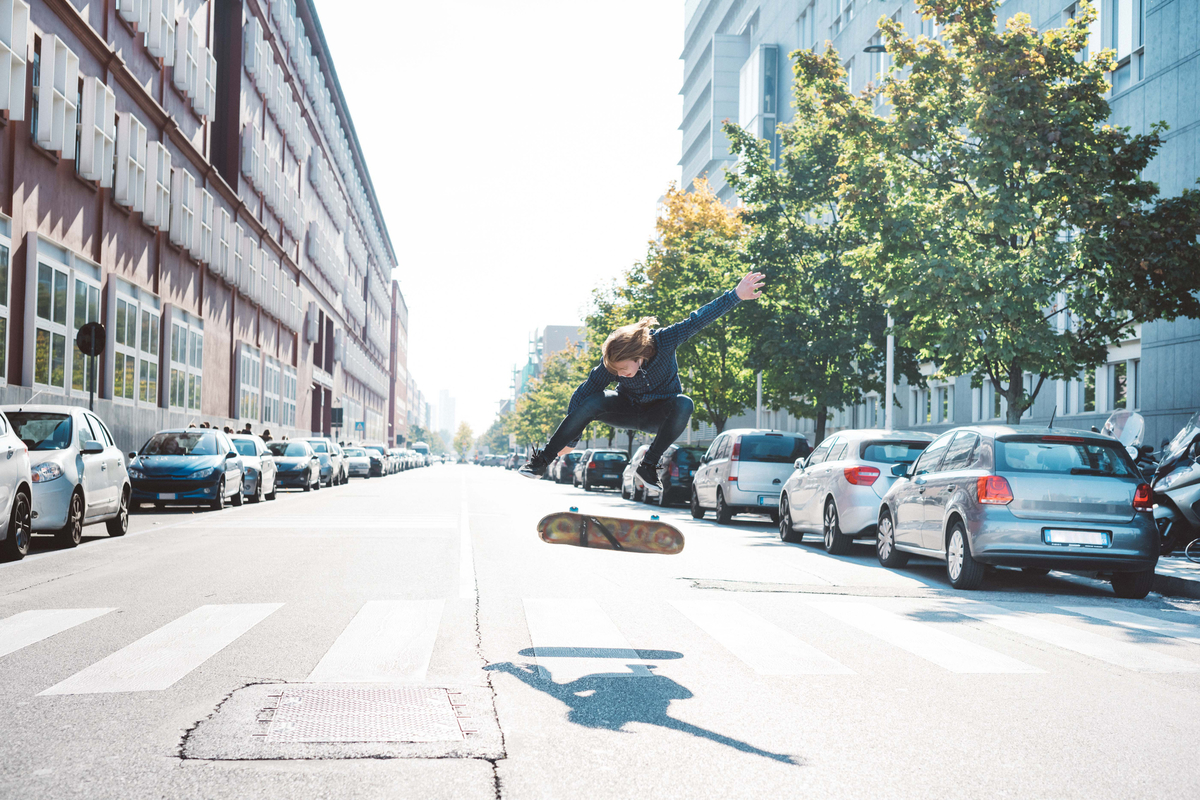

In [11]:
img_jpg = "skateboard_resized.jpg"
Image.open(img_jpg)

In [12]:
with open(img_jpg, 'rb') as file: input_img = file.read()

try:
    query_response = query_endpoint(input_img)
except Exception as e:
    if e.response['Error']['Code'] == 'ModelError':
        raise Exception(
             "Backend scripts have been updated in Feb '22 to standardize response "
             "format of endpoint response."
             "Previous endpoints may not support verbose response type used in this notebook."
             f"To use this notebook, please launch the endpoint again. Error: {e}."
        )
    else:
        raise
try:
    predictions, labels, image_labels =  parse_response(query_response)
except (TypeError, KeyError) as e:
    raise Exception(
          "Backend scripts have been updated in Feb '22 to standardize response "
          "format of endpoint response."
           "Response from previous endpoints not consistent with this notebook."
           f"To use this notebook, please launch the endpoint again. Error: {e}."
    )

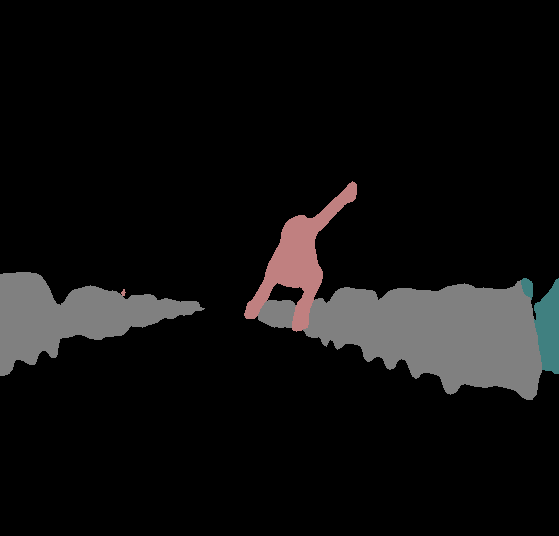

In [25]:
pallete = getvocpallete(256)
npimg = np.array(predictions)
npimg[npimg == -1] = 255
mask = Image.fromarray(npimg.astype('uint8'))
mask.putpalette(pallete)
mask